# Título

In [54]:
from collections import Counter

import re
import math
import time
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import requests

np.random.seed(42)

## Recap de momentos

In [48]:
dataset = pd.read_csv("cashback_dataset.csv")
dataset

,id,age,gender,income,education,region,purchase_frequency,purchase_amount,product_category,cuenta_con_cashback
0,1,27,Male,40682,Bachelor,East,frequent,18249,Books,yes
1,2,29,Male,15317,Masters,West,rare,4557,Clothing,no
2,3,37,Male,38849,Bachelor,West,rare,11822,Clothing,yes
3,4,30,Male,11568,HighSchool,South,frequent,4098,Food,no
4,5,31,Female,46952,College,North,occasional,19685,Clothing,no
...,...,...,...,...,...,...,...,...,...,...
99995,99996,31,Female,19691,College,West,occasional,7075,Health,no
99996,99997,36,Male,17428,HighSchool,South,rare,6873,Health,no
99997,99998,29,Male,13222,College,West,frequent,5152,Clothing,no
99998,99999,31,Female,40093,Bachelor,West,frequent,16312,Health,no


In [49]:
X = dataset["purchase_amount"]

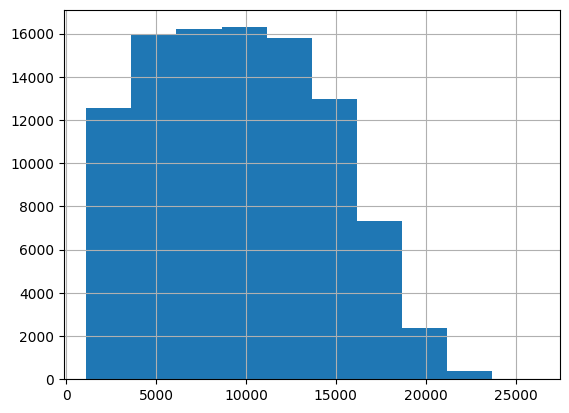

In [52]:
_ = X.hist()

### Valor esperado

$$
\mathbb{E}[X] = \sum_x x \, P(X = x) \quad \text{o, en caso continuo,} \quad \mathbb{E}[X] = \int_{-\infty}^{\infty} x \, f_X(x) \, dx
$$

In [56]:
mean_X = X.mean()
mean_X

9634.79084

### Varianza y desviación estándar

$$
\mathrm{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$


In [57]:
var_X = X.var()
var_X

23033659.149623588

$$
\sigma_X = \sqrt{\mathrm{Var}(X)}


In [58]:
std_X = math.sqrt(var_X)
std_X

4799.339449301704

In [ ]:
# Alternativamente...
X.std()

4799.339449301704

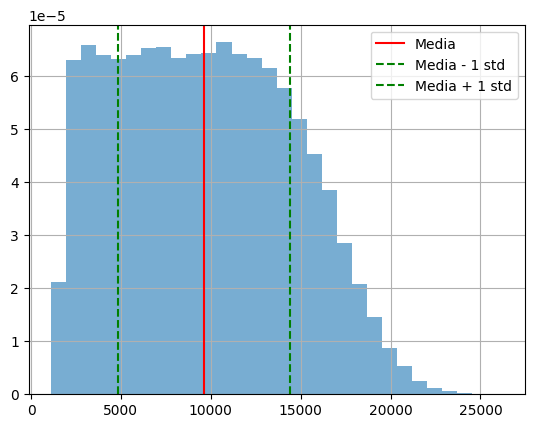

In [59]:
ax = X.hist(alpha=0.6, bins=30, density=True)

ax.axvline(mean_X, color='red', linestyle='-', label='Media')
ax.axvline(mean_X - std_X, color='green', linestyle='--', label='Media - 1 std')
ax.axvline(mean_X + std_X, color='green', linestyle='--', label='Media + 1 std')

ax.legend()
plt.show()

### Curtosis

$$
\text{Curtosis}(X) = \frac{\mathbb{E}[(X - \mathbb{E}[X])^4]}{\big(\mathrm{Var}(X)\big)^2}
$$

Curtosis de la distribución Laplace simulada: 6.0695


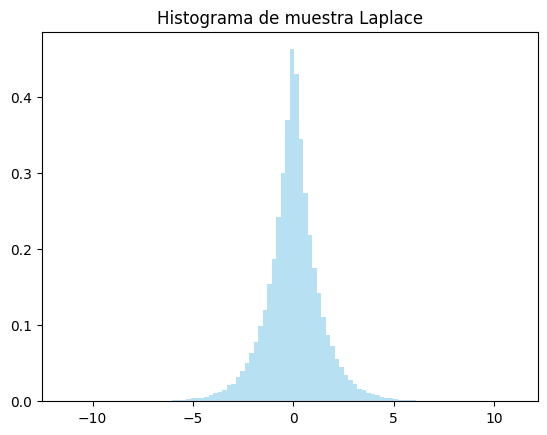

In [ ]:
# Cambiemos momentánemente de distribución
# Simulemos una distribución de Laplace
import numpy as np
from scipy.stats import kurtosis
import matplotlib.pyplot as plt

# Parámetros de la distribución de Laplace
loc = 0.0    # media
scale = 1.0  # escala (b)

# Simular muestra
n = 100000
data = np.random.laplace(loc, scale, n)

# Calcular curtosis (Fisher=False para curtosis estándar, no exceso)
curt = kurtosis(data, fisher=False)

print(f'Curtosis de la distribución Laplace simulada: {curt:.4f}')

# Graficar histograma
plt.hist(data, bins=100, density=True, alpha=0.6, color='skyblue')
plt.title('Histograma de muestra Laplace')
plt.show()


### Covarianza y correlación (de Pearson)

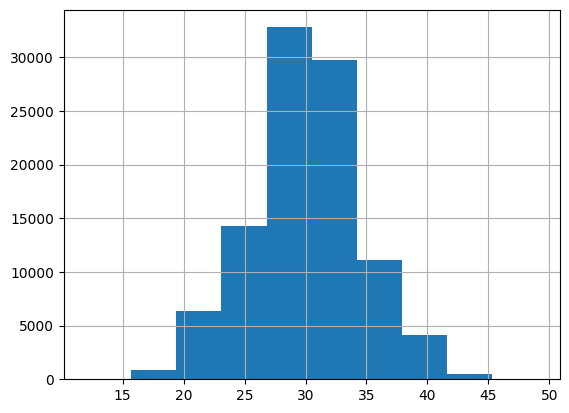

In [62]:
Y = dataset["age"]
_ = Y.hist()

$$
\mathrm{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])] = \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]
$$


In [61]:
cov_XY = X.cov(Y)
cov_XY

-44.911547253872556

$$
\rho_{X,Y} = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]}{\sqrt{\mathrm{Var}(X)} \sqrt{\mathrm{Var}(Y)}}
$$


In [65]:
std_Y = Y.std()

corr = cov_XY / (std_X * std_Y)
corr

-0.002088558844140835

El coeficiente de correlación de Pearson ($\rho$), mide la fuerza y dirección de la relación lineal entre dos variables aleatorias.  

Su valor siempre está en el rango:  
$$
-1 \leq \rho \leq 1
$$

- $\rho = 1$: correlación lineal positiva perfecta (ambas variables aumentan juntas).  
- $\rho = -1$: correlación lineal negativa perfecta (una variable aumenta mientras la otra disminuye).  
- $\rho = 0$: no existe relación lineal (aunque puede haber dependencia no lineal).  

Valores cercanos a \(1\) o \(-1\) indican relaciones lineales fuertes, mientras que valores cercanos a 0 indican relaciones lineales débiles o nulas.


## Varianza infinita

Texto del link

La función de densidad de una variable aleatoria (que se distribuye) Cauchy es:  

$$
f(x; x_0, \gamma) = \frac{1}{\pi \gamma \left[1 + \left(\frac{x - x_0}{\gamma}\right)^2\right]}
$$

donde \( x_0 \) es la ubicación y \( \gamma > 0 \) la escala.  

Al intentar calcular \( \mathbb{E}[X] \) o \( \mathrm{Var}(X) \), las integrales respectivas no convergen.


Cauchy - Varianza empírica: 36223.3684 (puede ser muy grande o indefinida)


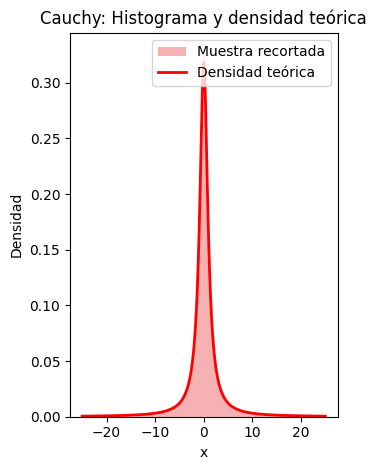

In [34]:
# Distribución de Cauchy

import numpy as np
from scipy.stats import kurtosis, cauchy
import matplotlib.pyplot as plt

# --- Distribución Cauchy ---
cauchy_data = np.random.standard_cauchy(n)

# Recortar extremos para visualizar histograma
cauchy_data_rec = cauchy_data[(cauchy_data > -25) & (cauchy_data < 25)]
# Varianza empírica puede ser enorme o NaN (no definida)
try:
    cauchy_var = np.var(cauchy_data)
except FloatingPointError:
    cauchy_var = float('nan')

print(f'Cauchy - Varianza empírica: {cauchy_var:.4f} (puede ser muy grande o indefinida)')

plt.subplot(1, 2, 2)
plt.hist(cauchy_data_rec, bins=200, density=True, alpha=0.6, color='lightcoral', label='Muestra recortada')
x = np.linspace(-25, 25, 1000)
pdf = cauchy.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='Densidad teórica')
plt.title('Cauchy: Histograma y densidad teórica')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()


La distribución de Cauchy aparece en varios fenómenos naturales y físicos, por ejemplo:

- **Resonancia en física:** Describe la forma de líneas de resonancia en espectros atómicos y moleculares, donde las desviaciones grandes son frecuentes.

- **Fenómenos de dispersión:** Modela la distribución de posiciones o energías en procesos de dispersión de partículas y ondas con interacciones fuertes.

- **Procesos de mezcla y fluctuaciones:** En mezclas turbulentas o sistemas caóticos, variables asociadas pueden seguir distribuciones con colas pesadas similares a la Cauchy.

- **Errores de medición con outliers grandes:** En análisis de datos con errores atípicos muy grandes, la distribución de Cauchy puede describir mejor esos errores que la normal.


## Leyes de potencias (Zipf) y gráficas log-log

In [35]:
# Retomemos el libro de Drácula
response = requests.get("https://www.gutenberg.org/cache/epub/345/pg345.txt")
libro = response.text

In [70]:
palabras = re.findall(r'\b\w+\b', libro.lower())

# Contar frecuencias
conteo = Counter(palabras)

# Obtener las n palabras más comunes
n = 25
palabras_mas_comunes = conteo.most_common(n)
palabras_mas_comunes

[('the', 8101),
 ('and', 5974),
 ('i', 4843),
 ('to', 4746),
 ('of', 3754),
 ('a', 3009),
 ('he', 2581),
 ('in', 2567),
 ('that', 2502),
 ('it', 2187),
 ('was', 1881),
 ('as', 1602),
 ('for', 1564),
 ('we', 1561),
 ('is', 1525),
 ('you', 1486),
 ('his', 1471),
 ('me', 1455),
 ('not', 1428),
 ('with', 1334),
 ('my', 1261),
 ('all', 1183),
 ('be', 1133),
 ('so', 1109),
 ('at', 1098)]

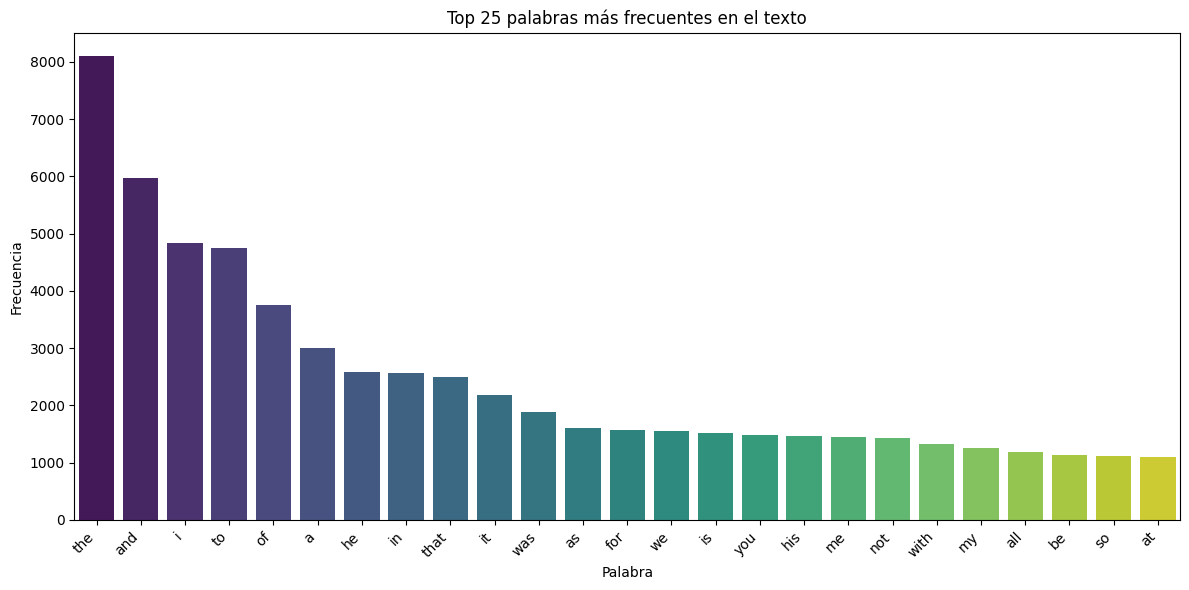

In [37]:
vocabulario, frecuencias = zip(*palabras_mas_comunes)

# vocabulario = ('hola', 'mundo', 'python')
# frecuencias = (5, 3, 7)

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x=list(vocabulario), y=list(frecuencias), palette='viridis', hue=list(vocabulario), legend=False)
plt.xticks(rotation=45, ha='right')
plt.title(f"Top {n} palabras más frecuentes en el texto")
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

### Ley de Zipf

Para cada palabra, considera su ranking $r$:
 1. `"the"`: $r = 1$ (más frecuente)
 2. `"and"`: $r = 2$ (segunda más frecuente)
 3. `"i"`: $r = 3$ (tercera más frecuente)
y así sucesivamente.

Decimos que un dataset sigue la **ley de Zipf** si:

$$f(r) \propto \frac{1}{r^\alpha}$$

donde $f$ nos da la frecuencia o conteo de la palabra con rango $r$ (por ejemplo, $f(1) = 8101$). Dicho de otro modo, 

$$f(r) = \frac{C}{r^\alpha}$$

para alguna constante $C$.

In [71]:
# Obtención del arreglo de frecuencias (f)
freqs = np.array(sorted(conteo.values(), reverse=True)) # Ordenamos de mayor a menor

In [72]:
# Obtención del arreglo de ranking (r)
# Rangos: 1, 2, 3, ...
ranks = np.arange(1, len(freqs) + 1)

Note que si toma logaritmos de ambos lados, llegamos a la fórmula:

$$\log f(r) = - \alpha \log r + \log C  $$

la cual es la ecuación de una recta en su forma $ y = mx + b $.

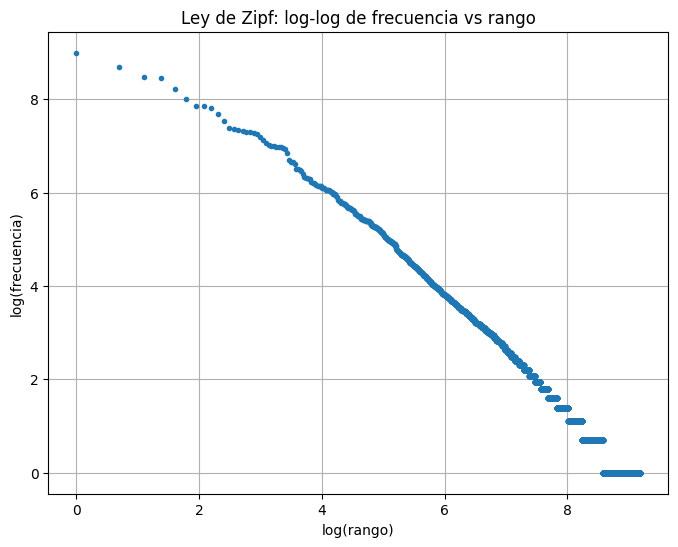

In [73]:
# Así, si al graficar log[f(r)] vs log[r] obtenemos una recta, entonces podemos decir que nuestro dataset sigue una ley de Zipf.

# Log-log plot
plt.figure(figsize=(8,6))
plt.plot(np.log(ranks), np.log(freqs), marker='.', linestyle='none')
plt.xlabel('log(rango)')
plt.ylabel('log(frecuencia)')
plt.title('Ley de Zipf: log-log de frecuencia vs rango')
plt.grid(True)
plt.show()

## Obteniendo ¿binomiales?

Recordar que la suma de variables aleatorias independientes e idénticamente distribuidas (iid) de Bernoulli con parámetro $ p $ sigue una distribución binomial:  
$$
S_n = \sum_{i=1}^n X_i \sim \mathrm{Binomial}(n, p)
$$


In [41]:
# Construcción del dataset
# 1️⃣ Limpiamos el encabezado y pie de página de Project Gutenberg
inicio = libro.find("CHAPTER I")
final = libro.find("End of the Project Gutenberg EBook")
libro_cuerpo = libro[inicio:final].strip()

# 2️⃣ Dividir por capítulos usando regex (manteniendo el texto)
# El patrón busca "CHAPTER" + número romano, y corta antes del siguiente
capitulos_raw = re.split(r'(CHAPTER [IVXLCDM]+)', libro_cuerpo)

# 3️⃣ Reconstruir para que cada capítulo sea un solo string
capitulos = []
for i in range(1, len(capitulos_raw), 2):  # índice 1: título, índice 2: contenido
    titulo = capitulos_raw[i].strip()
    contenido = capitulos_raw[i+1].strip() if i+1 < len(capitulos_raw) else ""
    capitulos.append(f"{titulo}\n{contenido}")

# Verificar
print(f"Se extrajeron {len(capitulos)} capítulos.")
print("Primer capítulo:\n")
print(capitulos[2][:500])  # solo los primeros 500 caracteres

Se extrajeron 54 capítulos.
Primer capítulo:

CHAPTER III
. Jonathan Harker’s Journal


In [42]:
# Binomiales?
from sklearn.feature_extraction.text import CountVectorizer

# Construir el vectorizador
vectorizer = CountVectorizer(binary=True)  # binary=True para 1/0 en vez de conteos
X = vectorizer.fit_transform(capitulos)

# Crear DataFrame
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

df

,000,10,11,12,12th,13,14,1500,16,17,...,youthful,yus,zeal,zealous,zoo,zoölogical,zoöphagous,zoöphagy,æt,ætat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df['suma'] = df.sum(axis=1) # total_palabras_distintas

In [44]:
df

,000,10,11,12,12th,13,14,1500,16,17,...,yus,zeal,zealous,zoo,zoölogical,zoöphagous,zoöphagy,æt,ætat,suma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


<Axes: >

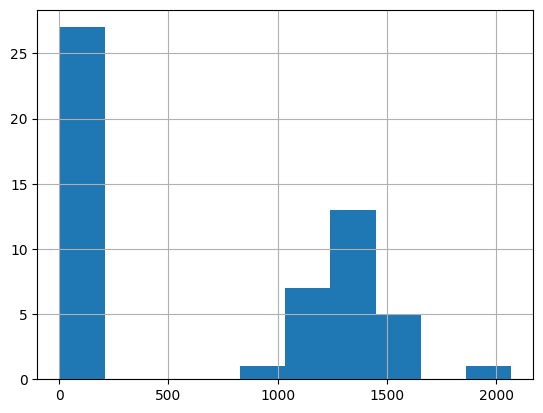

In [45]:
df['suma'].hist()

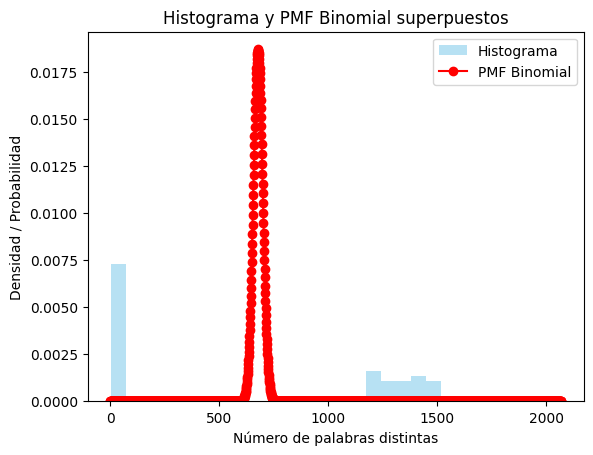

In [46]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

# Valores observados
data = df['suma']

# Parámetros binomial (elige estimados o teóricos)
n = data.max()              # máximo número posible de palabras distintas (como ejemplo)
p = data.mean() / n         # probabilidad estimada como promedio/número máximo

# Valores discretos para la binomial
x = np.arange(n+1)
pmf_binomial = binom.pmf(x, n, p)

# Graficar histograma normalizado (densidad)
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label='Histograma')

# Graficar pmf binomial
plt.plot(x, pmf_binomial, 'o-', color='red', label='PMF Binomial')

plt.xlabel('Número de palabras distintas')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.title('Histograma y PMF Binomial superpuestos')
plt.show()


¿Qué o cuáles hipótesis no se cumplieron?